Simple generator test

In [1]:
import matplotlib
import torch
from IPython.core.display import display, clear_output
from matplotlib import pyplot as plt
from torch.nn import LeakyReLU
from torch.optim import Adam

from evaluators import DirectEvaluator
from generators import SingleLevelGenerator
from helpers import set_matplotlib_colors
from renderer import render_single_enemy
from shared_parameters import *
from utils import save

set_matplotlib_colors(matplotlib)

In [2]:
oracle = DirectEvaluator(connector_length, max_angle, enemy_radius, bob_radius)

Display a randomly generated state

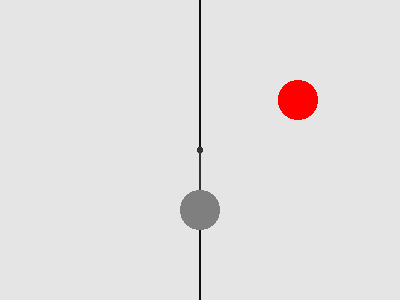

In [3]:
x = np.linspace(enemy_x_min, enemy_x_max, subdivisions)
enemy_x = np.random.choice(x, 1).item()
image = render_single_enemy(enemy_x, resolution=0.5)

display(image)
save(image, "./data/example.png")

Difficulty evaluator training loop

In [12]:
bounds = torch.tensor([[enemy_x_min, enemy_x_max]])
generator = SingleLevelGenerator(bounds, hidden=[8, 8], activation=LeakyReLU(), optimizer_class=Adam, lr=0.01)

difficulties = torch.linspace(0, 1, 1000).unsqueeze(-1)
batch_size = 25

iteration = 0


def iterate(verbose=False):
    global iteration

    # Sample from the dataset
    indices = torch.randperm(difficulties.shape[0])[:batch_size]
    sample = difficulties[indices]

    # Generate levels
    generated_levels = generator(sample)

    # Evaluate the difficulty
    d_out = oracle(generated_levels)

    # Train the generator
    loss = generator.update(d_out)

    iteration += 1

    if verbose:
        clear_output(wait=True)
        print(f"It. {iteration} Loss={loss.item():.6f}")

        r_difficulties = torch.linspace(0, 1, 100).unsqueeze(-1)

        with torch.no_grad():
            r_generated_levels = generator(r_difficulties)

        plt.plot(r_generated_levels.squeeze(), r_difficulties.squeeze())
        plt.plot(x, oracle(x))
        plt.show()


for i in range(100):
    for _ in range(50):
        iterate()

    iterate(verbose=True)

It. 1173 Loss=0.000582


KeyboardInterrupt: 

It. 5002 Loss=0.000729


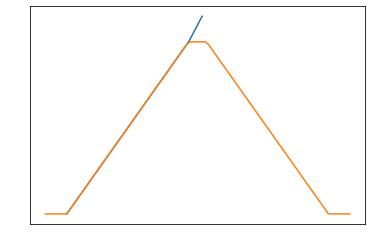

In [5]:
iterate(verbose=True)